In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [99]:
data = pd.read_csv("../data/cars.csv")

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

<font size=4>
Датасет содержит следующие поля:

- `manufacturer_name` — марка машины
- `model_name` — модель машины
- `transmission` — трансмиссия автомобиля (механическая/автоматическая)
- `color` — цвет машины
- `odometer_value` — пробег машины (км)
- `year_produced` — год производства машины
- `engine_fuel` — тип топлива, используемого двигателем
- `engine_has_gas` — оборудован ли автомобиль баллоном с пропаном и трубками
- `engine_type` — тип двигателя
- `engine_capacity` — ёмкость двигателя (литры)
- `body_type` — тип кузова
- `has_warranty` — имеет ли гарантию
- `state` — состояние машины
- `drivetrain` — привод машины (передний/задний/полный)
- `price_usd` — цена (в долларах)
- `is_exchangeable` — есть ли возможность обмена
- `location_region` — область, в которой машина выставлена на продажу
- `number_of_photos` — число фотографий машины
- `up_counter` — число модернизаций автомобиля
- `feature_0-9` — есть ли в автомобиле такие опции, как литые диски, кондиционер и т. д.
- `duration_listed` — сколько времени прошло с момента выставления машины на продажу (в днях)
</font>

In [101]:
data.head(20)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43


In [102]:
data.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [103]:
data.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

<font size=4>
    Пропуски присутствуют только в столбце 'engine_capacity'. Так как число пропусков небольшое, мы можем просто удалить строки с пропущенными значениями.
</font>

In [104]:
data = data.dropna(subset='engine_capacity')

In [105]:
data.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

<font size = 4>
    Значения 'feature_0-9' обозначают наличие различного оснащения в автомобиле, причём не указано, какого именно, так что сама по себе эта информация нам ничего не даёт и можно заменить эти 10 столбцов одним, обозначающим количество оборудования в автомобиле
</font>

In [106]:
columns = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7','feature_8', 'feature_9']
features = data[columns]
features = features.astype(int).sum(axis=1)
data['features_count'] = features

In [107]:
data = data.drop(columns=columns)
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,features_count
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,owned,all,10900.00,False,Минская обл.,9,13,16,7
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,owned,all,5000.00,True,Минская обл.,12,54,83,4
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2800.00,True,Минская обл.,4,72,151,3
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,owned,all,9999.00,True,Минская обл.,9,42,86,1
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,4


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38521 entries, 0 to 38530
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38521 non-null  object 
 1   model_name         38521 non-null  object 
 2   transmission       38521 non-null  object 
 3   color              38521 non-null  object 
 4   odometer_value     38521 non-null  int64  
 5   year_produced      38521 non-null  int64  
 6   engine_fuel        38521 non-null  object 
 7   engine_has_gas     38521 non-null  bool   
 8   engine_type        38521 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38521 non-null  object 
 11  has_warranty       38521 non-null  bool   
 12  state              38521 non-null  object 
 13  drivetrain         38521 non-null  object 
 14  price_usd          38521 non-null  float64
 15  is_exchangeable    38521 non-null  bool   
 16  location_region    38521 no

<font size = 4>
    Исправим тип данных у столбца 'price_usd', так как он не нуждается в дробном формате, переведём все булевские столбцы в целочисленные
</font>

In [109]:
data['price_usd'] = data['price_usd'].astype(int)
data['engine_has_gas'] = data['engine_has_gas'].astype(int)
data['has_warranty'] = data['has_warranty'].astype(int)
data['is_exchangeable'] = data['is_exchangeable'].astype(int)

<font size = 4>
    Столбцы 'transmission', 'engine_type', 'state' и 'drivetrain' содержат мало уникальных значений, поэтому закодируем их в числовые с помощью one-hot кодирования.
</font>

In [110]:
print(data['transmission'].unique())
print(data['engine_type'].unique())
print(data['state'].unique())
print(data['drivetrain'].unique())

['automatic' 'mechanical']
['gasoline' 'diesel']
['owned' 'emergency' 'new']
['all' 'front' 'rear']


In [111]:
data = pd.get_dummies(data, columns=['transmission', 'engine_type', 'state', 'drivetrain'], dtype=int)

<font size = 4>
    Остальные столбцы закодируем, назначив каждому значению свой номер
</font>

In [112]:
object_columns = data.select_dtypes(include=['object']).columns
decoder = {}
for column in object_columns:
    data[column] = data[column].astype('category')
    decoder[column] = dict(enumerate(data[column].cat.categories))
    data[column] = data[column].cat.codes

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38521 entries, 0 to 38530
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manufacturer_name        38521 non-null  int8   
 1   model_name               38521 non-null  int16  
 2   color                    38521 non-null  int8   
 3   odometer_value           38521 non-null  int64  
 4   year_produced            38521 non-null  int64  
 5   engine_fuel              38521 non-null  int8   
 6   engine_has_gas           38521 non-null  int64  
 7   engine_capacity          38521 non-null  float64
 8   body_type                38521 non-null  int8   
 9   has_warranty             38521 non-null  int64  
 10  price_usd                38521 non-null  int64  
 11  is_exchangeable          38521 non-null  int64  
 12  location_region          38521 non-null  int8   
 13  number_of_photos         38521 non-null  int64  
 14  up_counter               38

<font size = 4>
    Проверим данные на наличие дубликатов и удалим их, если они имеются.
</font>

In [114]:
int(data.duplicated().sum())

41

In [115]:
data = data.drop_duplicates()
int(data.duplicated().sum())

0

<font size = 4>
    Проверим на наличие выбросов столбцы 'price_usd','odometer_value','up_counter','duration_listed','engine_capacity', 'number_of_photos'
</font>

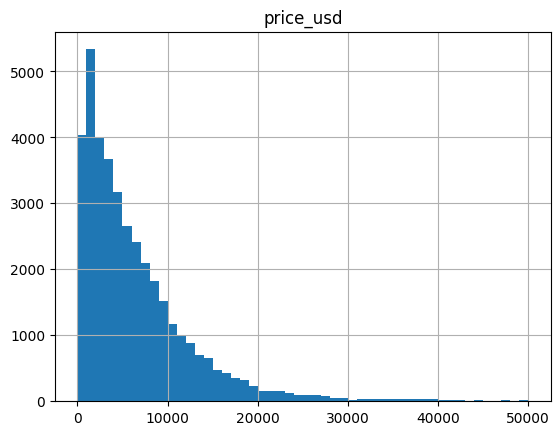

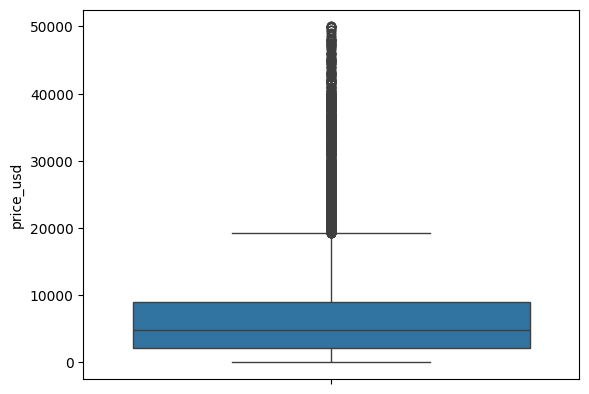

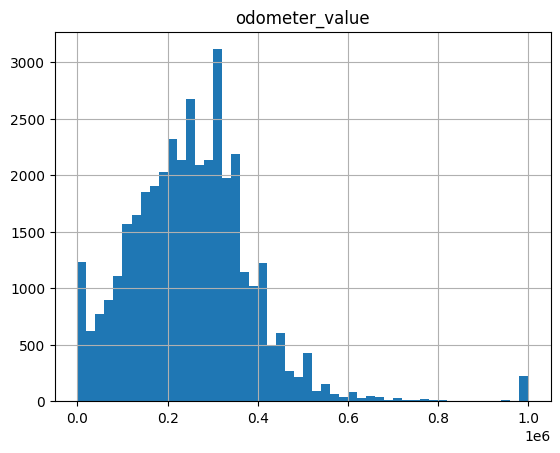

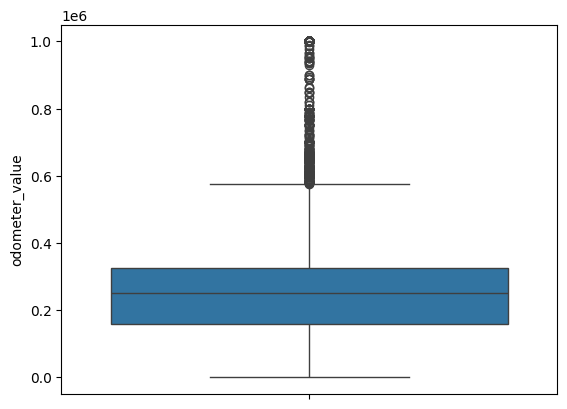

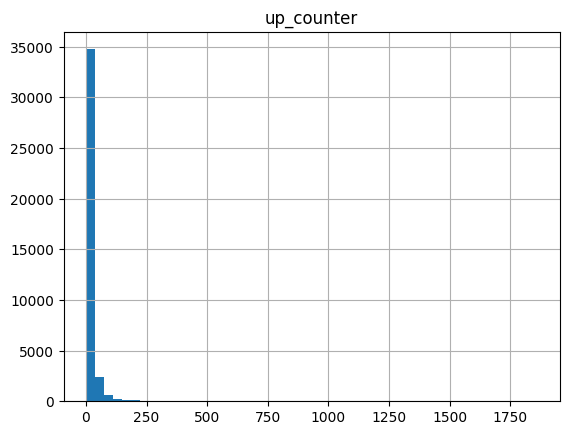

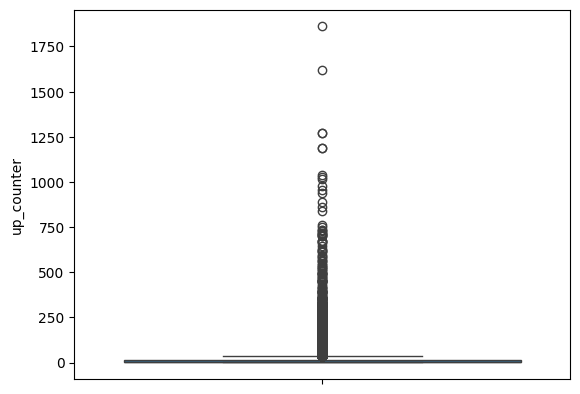

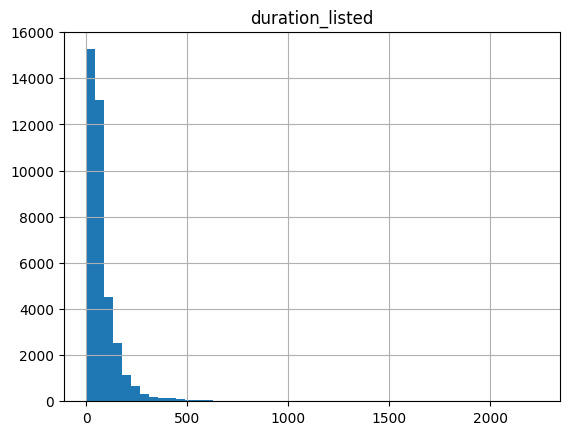

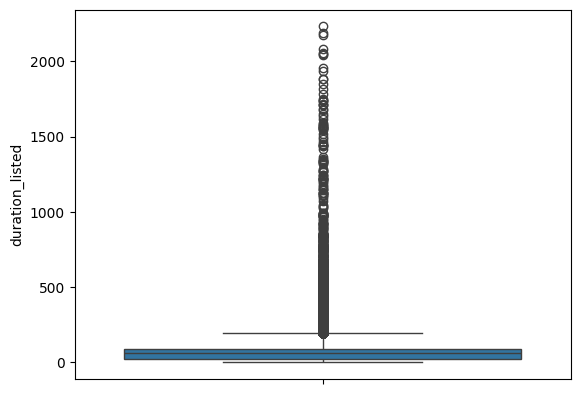

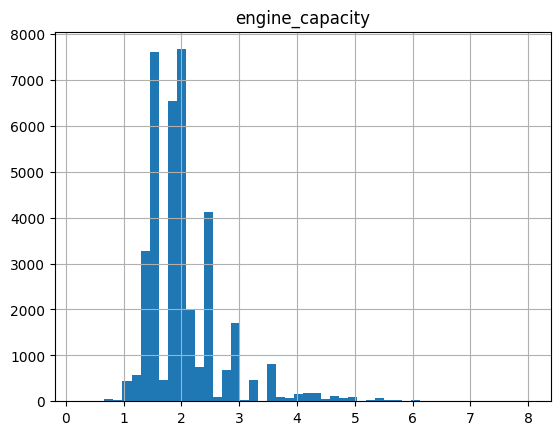

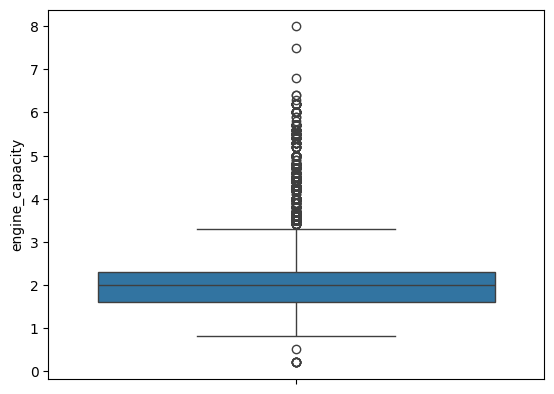

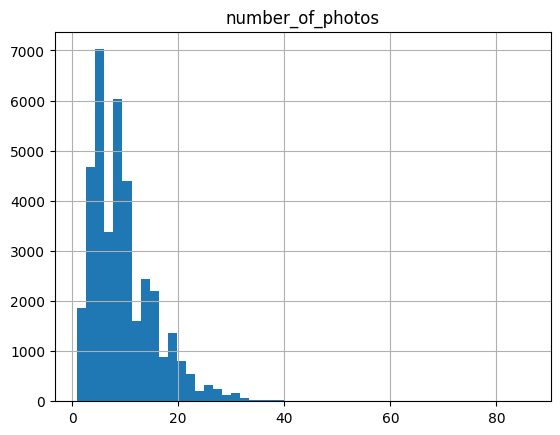

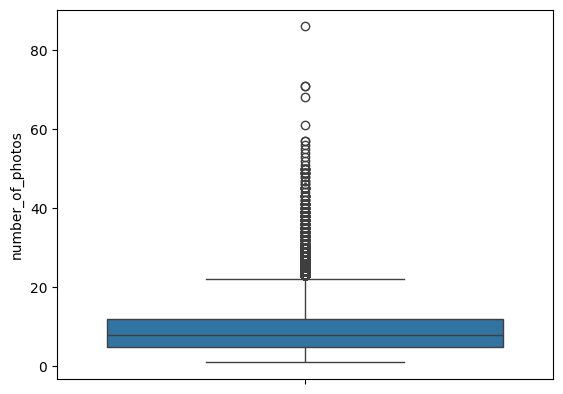

In [116]:
columns = ['price_usd','odometer_value','up_counter','duration_listed','engine_capacity', 'number_of_photos']

for column in columns:
    data.hist(column, bins=50)
    plt.show()
    sns.boxplot(data=data[column])
    plt.show()

<font size = 4>
Обработаем выбросы для этих столбцов.
</font>

In [117]:
outlier = data[['price_usd','odometer_value','up_counter','duration_listed','engine_capacity', 'number_of_photos']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)

In [118]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,...,transmission_automatic,transmission_mechanical,engine_type_diesel,engine_type_gasoline,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,45,763,8,190000,2010,2,0,2.5,10,0,...,1,0,0,1,0,0,1,1,0,0
4,45,664,0,280000,2001,2,0,2.5,10,0,...,1,0,0,1,0,0,1,1,0,0
7,45,664,8,350000,2004,2,0,2.5,8,0,...,1,0,0,1,0,0,1,1,0,0
8,45,763,4,179000,2010,2,0,2.5,10,0,...,1,0,0,1,0,0,1,1,0,0
9,45,519,8,571317,1999,2,0,2.5,10,0,...,1,0,0,1,0,0,1,1,0,0


<font size = 4>
    Сравним параметры до и после удаления выбросов
</font>

[[<Axes: title={'center': 'price_usd'}>]]
[[<Axes: title={'center': 'price_usd'}>]]


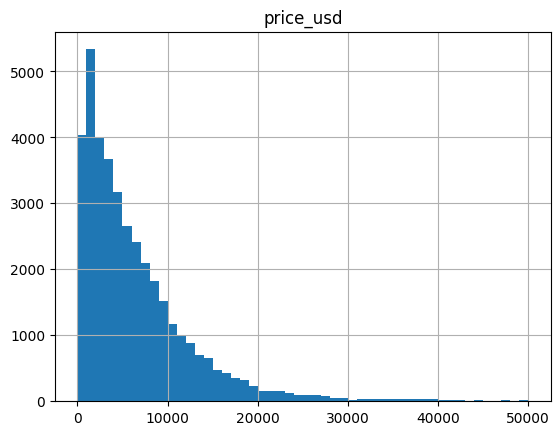

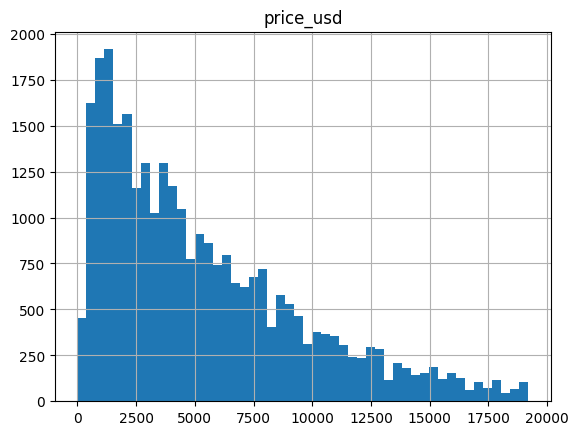

In [120]:
print(data.hist('price_usd', bins=50))
print(data_filtered.hist('price_usd', bins=50))

<font size=4>
    После удаления выбросов ценовой разброс снизился с максимальных 50000 до 20000 долларов. Гистограмма скошена вправо, что говорит о том, что среднее значение больше медианы. Наибольшая часть автомобилей находится в ценовой категории 1000-2500 долларов, автомобили за более высокую цену можно считать дорогими.
</font>

[[<Axes: title={'center': 'odometer_value'}>]]
[[<Axes: title={'center': 'odometer_value'}>]]


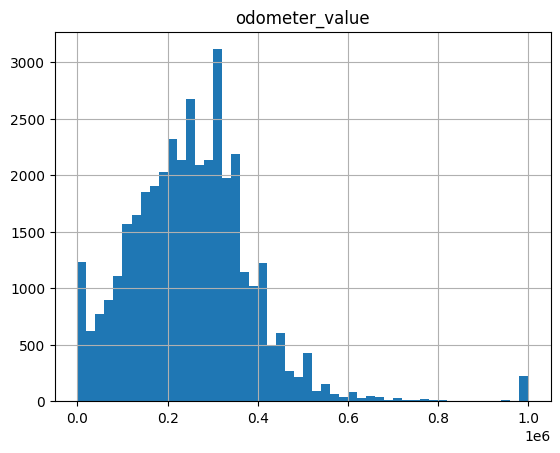

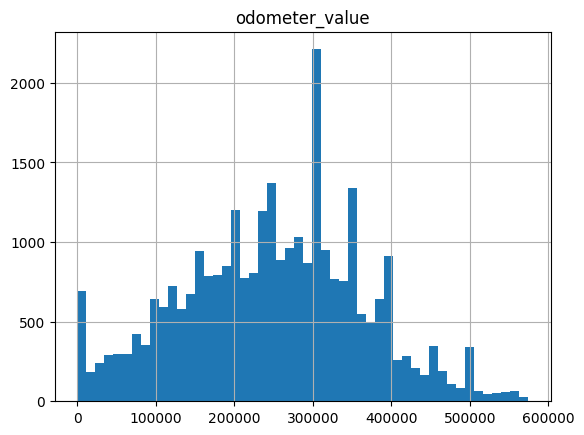

In [121]:
print(data.hist('odometer_value', bins=50))
print(data_filtered.hist('odometer_value', bins=50))

<font size=4>
    После удаления выбросов разброс пробега снизился с максимальных 1000000 до 600000 километров. Распределение на гистограмме после удаления выбросов стало более похожим на нормальное распределение. Из графика видно, что у большинства автомобилей пробег составляет около 200000-400000 километров. Если диапазон ниже среднего, это означает, что автомобиль используется редко или иногда. Если больше, это означает, что автомобиль интенсивно использовался предыдущим владельцем.
</font>

[[<Axes: title={'center': 'up_counter'}>]]
[[<Axes: title={'center': 'up_counter'}>]]


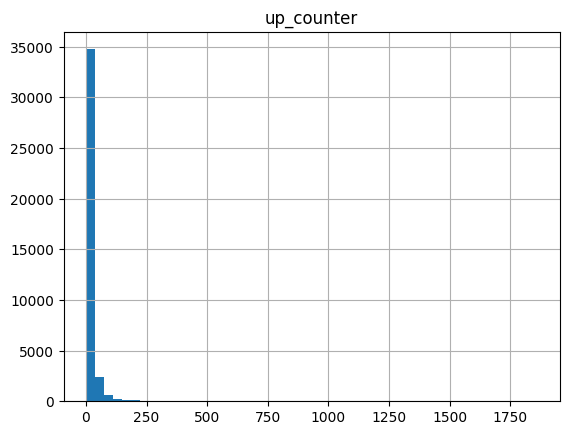

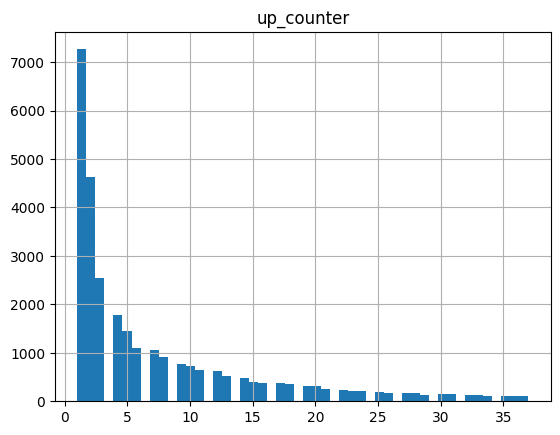

In [122]:
print(data.hist('up_counter', bins=50))
print(data_filtered.hist('up_counter', bins=50))

<font size=4>
    После удаления выбросов разброс числа модернизаций автомобиля снизился со значения, превосходящего 1750 до 35-40. Гистограмма скошена вправо, что говорит о том, что среднее значение больше медианы. Наибольшая часть автомобилей модернизировалась от 0 до 5 раз, у таких автомобилей сохранилось больше заводских деталей и происходило меньше поломок, чем у остальных.
</font>

[[<Axes: title={'center': 'engine_capacity'}>]]
[[<Axes: title={'center': 'engine_capacity'}>]]


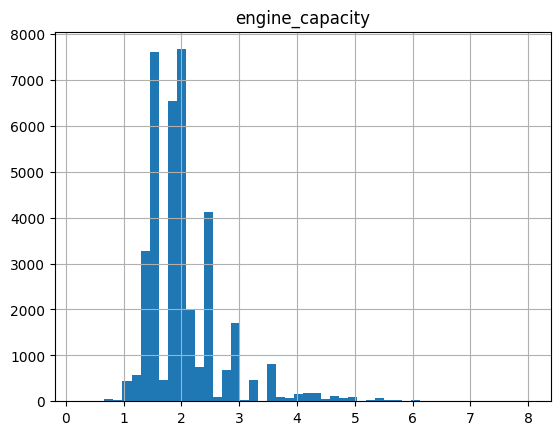

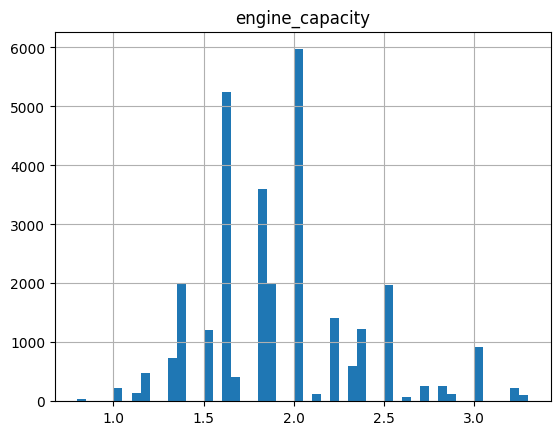

In [123]:
print(data.hist('engine_capacity', bins=50))
print(data_filtered.hist('engine_capacity', bins=50))

<font size=4>
    После удаления выбросов разброс ёмкости двигателя снизился, максимальное значение было равно 8, стало в диапазоне 3-3.5. Гистограмма похожа на нормальное распределение, преобладают значения ёмкости 1.6-2 литра.
</font>

[[<Axes: title={'center': 'duration_listed'}>]]
[[<Axes: title={'center': 'duration_listed'}>]]


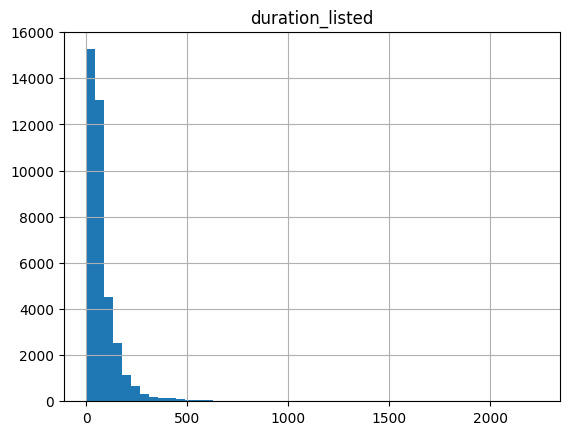

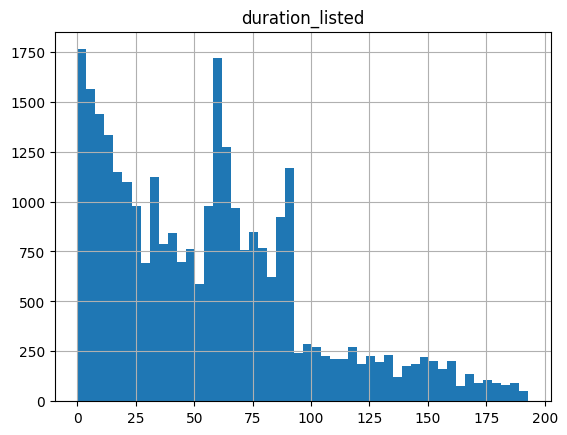

In [124]:
print(data.hist('duration_listed', bins=50))
print(data_filtered.hist('duration_listed', bins=50))

<font size=4>
    После удаления выбросов максимальное время продажи автомобилей снизилось со значения около 2000 дней до значения около 200 дней. Наиболее часто автомобили покупают за период от 0 до 90 дней, наиболее выгодные предложения покупают почти сразу, хорошие предложения продаются около 60 дней.
</font>

<font size=4>
    Исследуем влияние некоторых параметров автомобиля на его цену. Для удобства создадим отдельный датасет, в котором раскодируем некоторые закодированные ранее категориальные признаки
</font>

In [125]:
data_decoded = data_filtered[['price_usd', 'color', 'engine_fuel', 'body_type']].copy()
data_decoded['color'] = data_decoded['color'].map(decoder['color'])
data_decoded['engine_fuel'] = data_decoded['engine_fuel'].map(decoder['engine_fuel'])
data_decoded['body_type'] = data_decoded['body_type'].map(decoder['body_type'])

<font size = 4>
    Проверим, достаточно ли данных для анализа
</font>

In [126]:
data_decoded.value_counts('color')

color
silver    5495
black     5297
blue      4663
white     3068
grey      2807
red       2355
green     2274
other     2122
brown      590
violet     367
yellow     224
orange     131
Name: count, dtype: int64

In [127]:
data_decoded.value_counts('engine_fuel')

engine_fuel
gasoline         18310
diesel            9969
gas                961
hybrid-petrol      152
hybrid-diesel        1
Name: count, dtype: int64

In [128]:
data_decoded.value_counts('body_type')

body_type
sedan        10136
hatchback     6482
universal     4589
minivan       2922
suv           2722
minibus        957
van            575
liftback       468
coupe          445
pickup          62
cabriolet       35
Name: count, dtype: int64

<font size = 4>
    Исключим из анализа гибриды с дизельным топливом и машины с электрическим питанием, а также кабриолеты, так как их слишком мало для анализа, машин с остальными характеристиками достаточно.
</font>

<Axes: title={'center': 'price_usd'}, xlabel='color'>

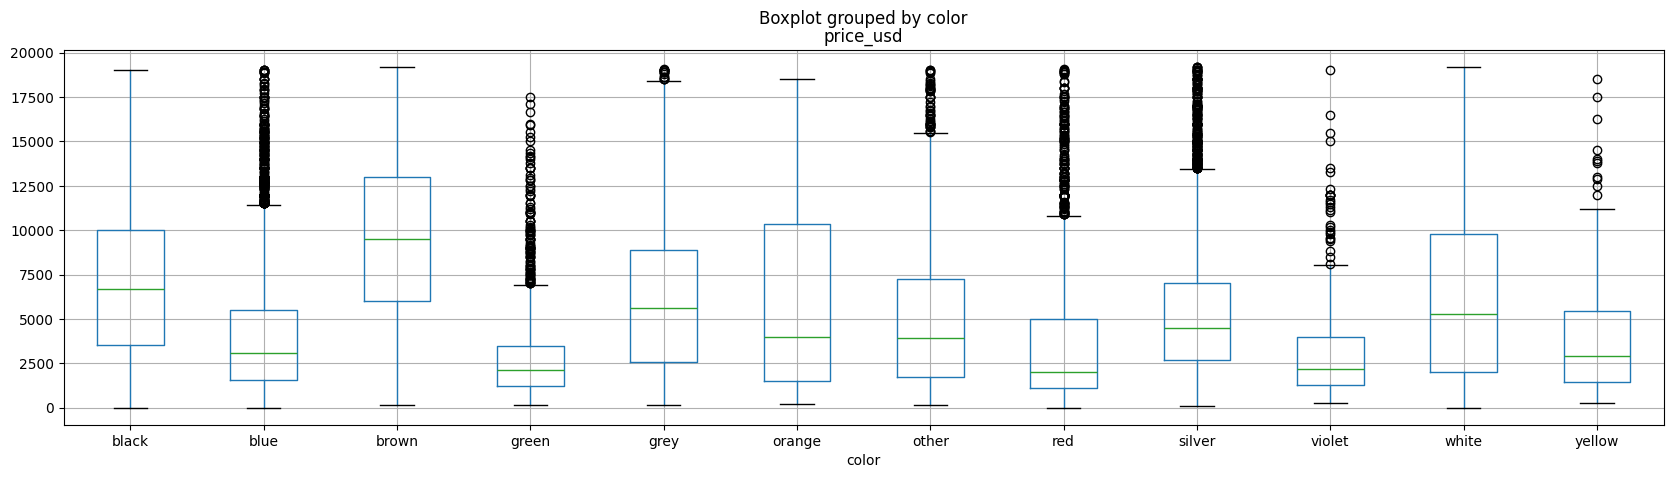

In [129]:
data_decoded.boxplot(by ='color', column ='price_usd', figsize=(20,5), grid = True)

<font size = 4>
    Заметим, что самые высокие цены на машины коричневого цвета. Из дорогих цветов также можно выделить чёрный, белый и серый. Отдельные машины оранжевого цвета также стоят очень дорого, но значительная часть таких машин стоит гораздо меньше. Из дешёвых цветов можно выделить красный, зелёный и фиолетовый, вероятно, такая цена является следствием непопулярности этих цветов.
</font>

<Axes: title={'center': 'price_usd'}, xlabel='engine_fuel'>

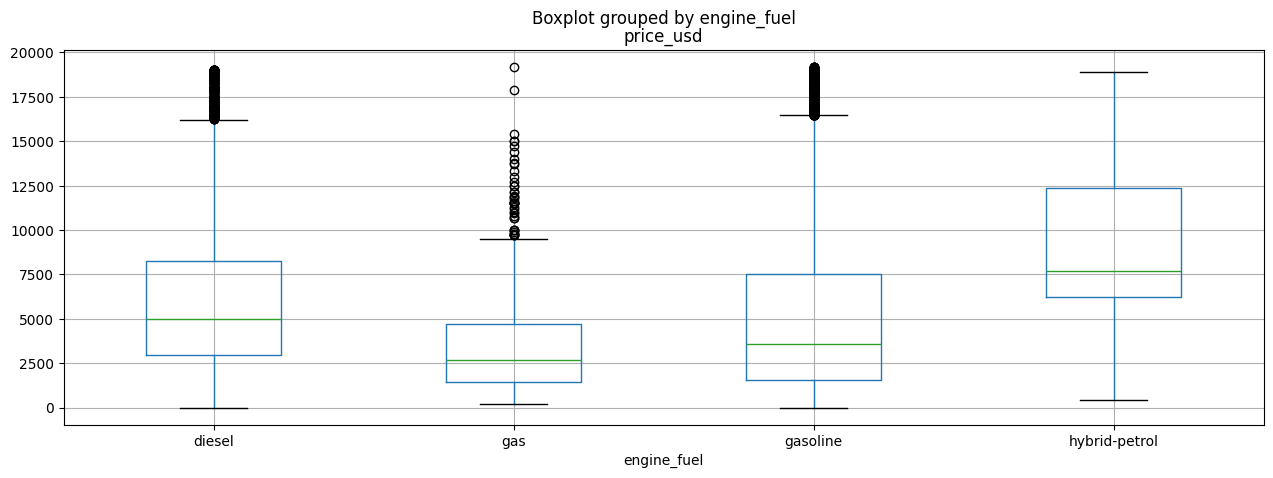

In [130]:
data_decoded.query('engine_fuel != ["electric", "hybrid-diesel"]').boxplot(by ='engine_fuel', column ='price_usd', figsize=(15,5), grid = True)

<font size = 4>
    Заметно, что гибриды с бензиновым топливом значительно дороже остальных, так как в таких машинах используются сложные и дорогие технологии питания автомобиля.
</font>

<Axes: title={'center': 'price_usd'}, xlabel='body_type'>

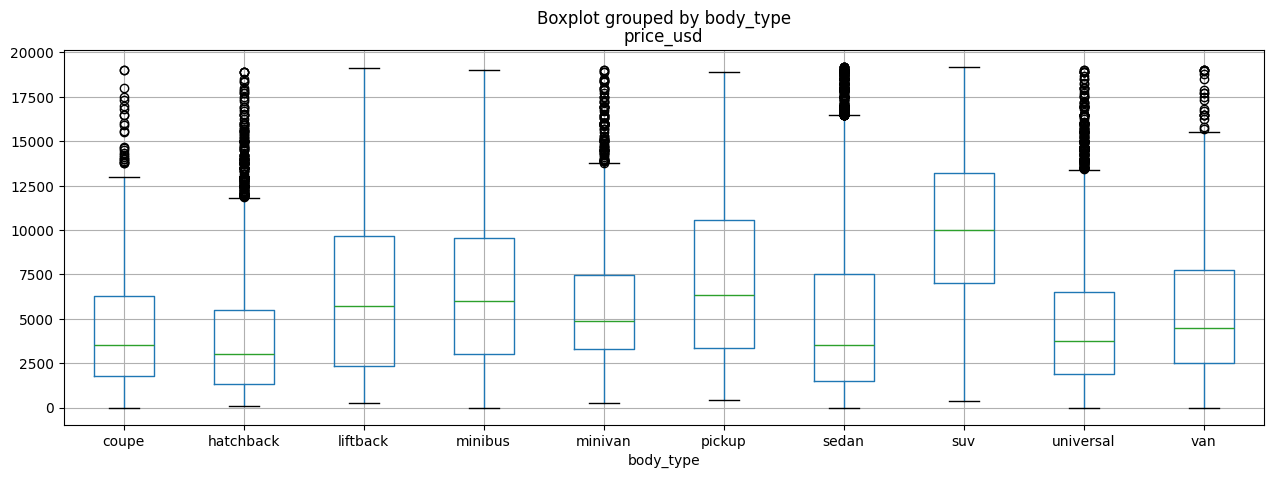

In [131]:
data_decoded.query('body_type != "cabriolet"').boxplot(by ='body_type', column ='price_usd', figsize=(15,5), grid = True)

<font size = 4>
    Значительно дороже остальных оцениваются внедорожники. К дорогим категориям относятся пикапы, микроавтобусы и лифтбеки.
</font>

<font size = 4>
    Проанализируем несколько других параметров с помощью графиков регрессии
</font>

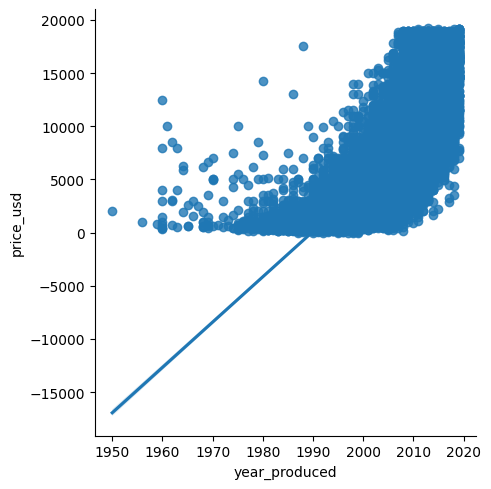

In [132]:
sns.lmplot(x="year_produced", y="price_usd", data=data_filtered)

In [133]:
data_filtered[['year_produced','price_usd']].corr()

,year_produced,price_usd
year_produced,1.00000,0.78413
price_usd,0.78413,1.00000


<font size=4>
    Из графиков и коэффициента корреляции видно, что существует почти линейная зависимость между годом производства автомобиля и его ценой, на самые новые автомобили цена значительно выше.
</font>

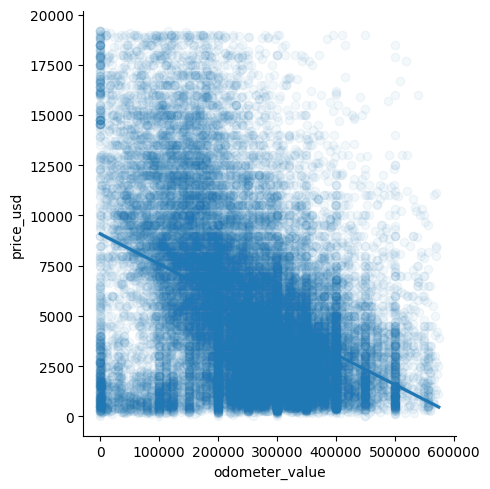

In [134]:
sns.lmplot(x="odometer_value", y="price_usd", data=data_filtered, scatter_kws={'alpha':0.05})

In [135]:
data_filtered[['odometer_value','price_usd']].corr()

,odometer_value,price_usd
odometer_value,1.000000,-0.409295
price_usd,-0.409295,1.000000


<font size=4>
    Из графиков и коэффициента корреляции видно, что цена автомобиля снижается с ростом пробега.
</font>

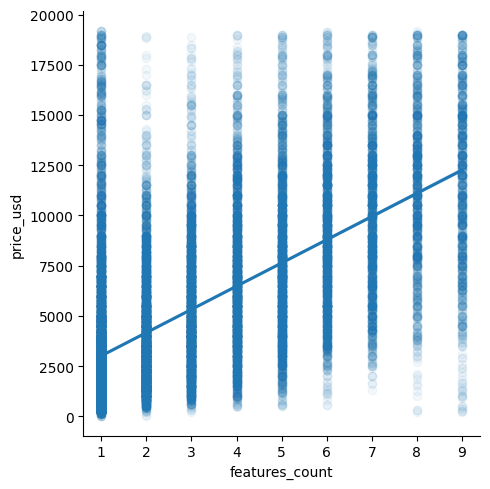

In [136]:
sns.lmplot(x="features_count", y="price_usd", data=data_filtered, scatter_kws={'alpha':0.05})

In [137]:
data_filtered[['features_count','price_usd']].corr()

,features_count,price_usd
features_count,1.000000,0.634316
price_usd,0.634316,1.000000


<font size=4>
    Из графиков и коэффициента корреляции видно, что цена автомобиля растёт по мере увелиения количества оборудования в машине
</font>

<font size=4>
    Исследуем зависимость цены от состояния автомобиля с помощью графика "ящик с усами"
</font>

In [138]:
data_filtered.value_counts(['state_new', 'state_owned', 'state_emergency'])

state_new  state_owned  state_emergency
0          1            0                  28941
           0            1                    296
1          0            0                    156
Name: count, dtype: int64

<Axes: title={'center': 'price_usd'}, xlabel='[state_new, state_owned, state_emergency]'>

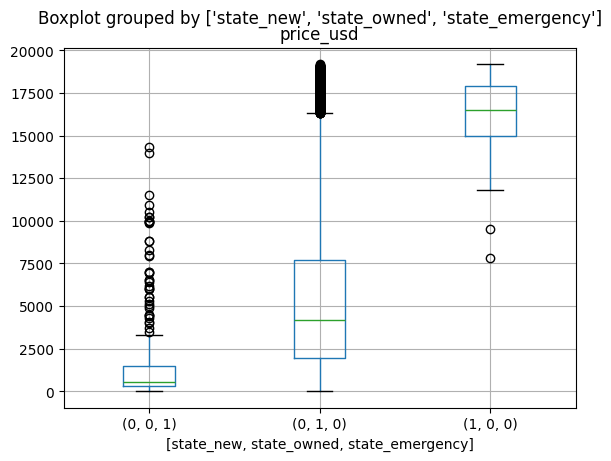

In [139]:
data_filtered.boxplot(by =['state_new', 'state_owned', 'state_emergency'], column ='price_usd', grid = True)

<font size=4>
    Можно заметить, что на машины в экстренном состоянии, как правило, очень низкая цена (около 1000 долларов), в то время как новые машины продаются по очень высокой цене (около 16000 долларов). Подержанные машины относятся к средней ценовой категории и имеют большой разброс цен с медианным значением около 4000 долларов.
</font>

<Axes: >

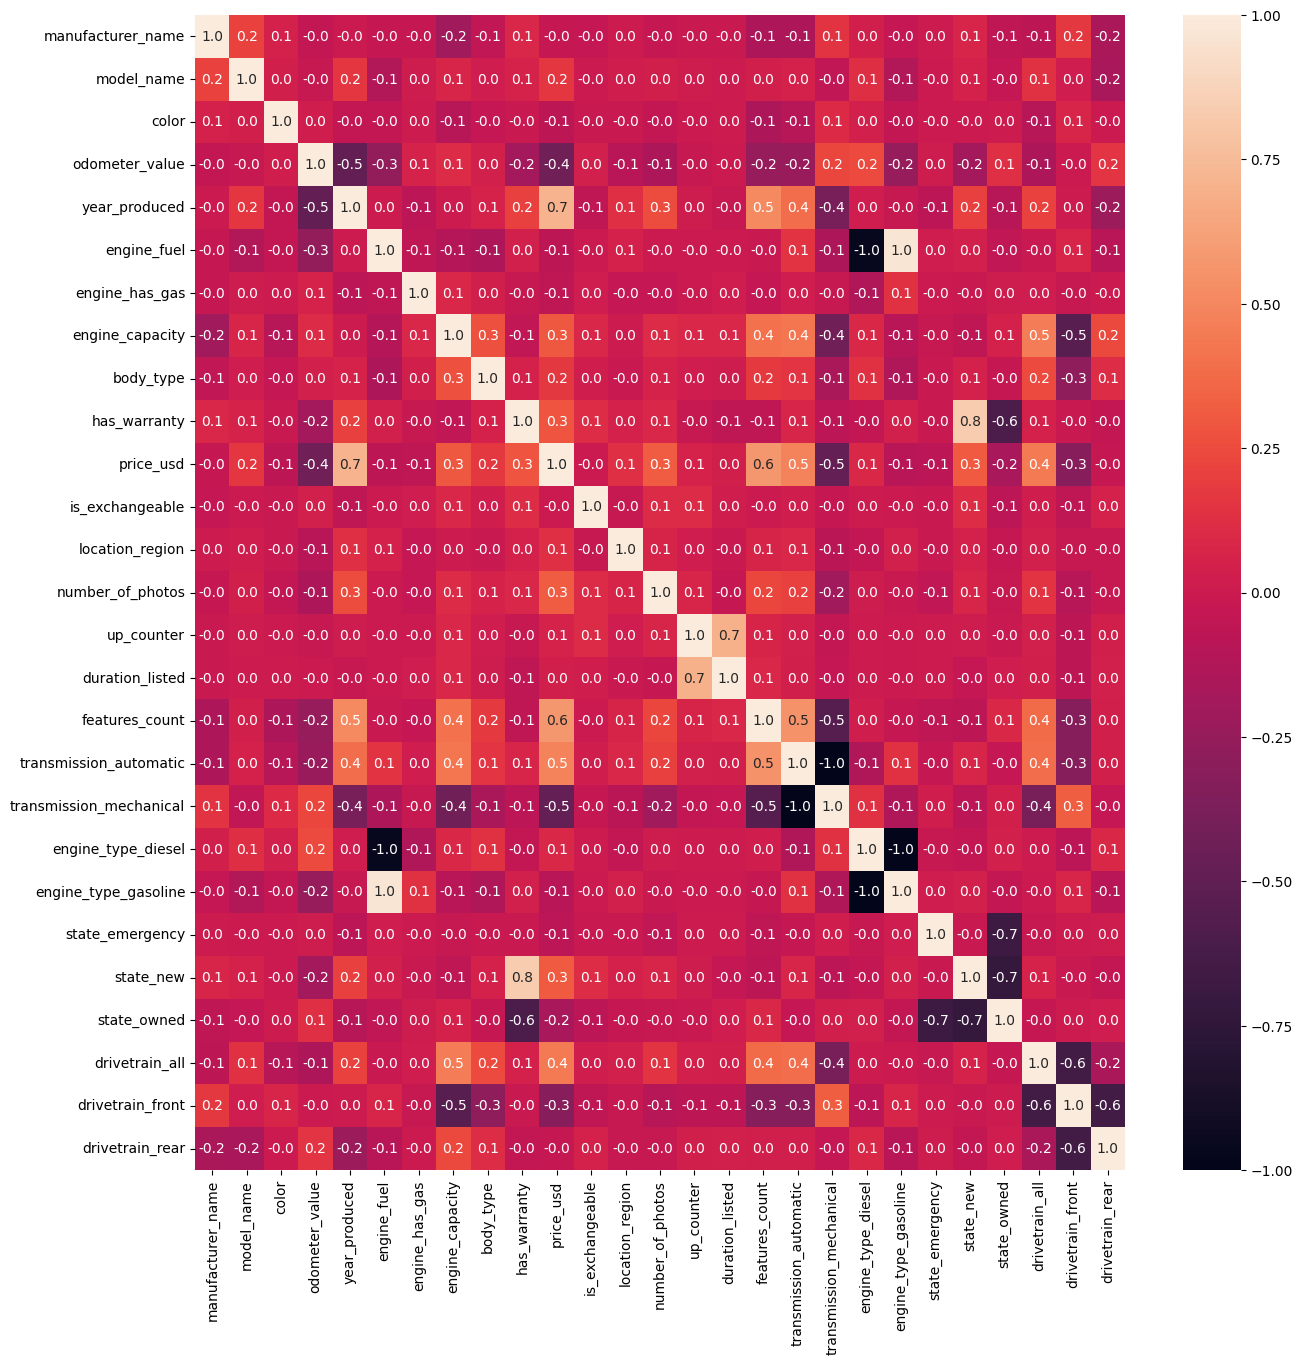

In [140]:
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, fmt=".1f")

In [141]:
data_filtered.to_csv("../data/cars_processed.csv", index=False)

<font size = 5><b>Выводы</b><br></font>
<font size = 4>
    Для предлагаемого датасета были заполнены пропуски, удалены дубликаты, изменена структура столбцов, исправлены типы данных в столбцах, исследовано влияние некоторых предикторов на целевой признак.  
    Анализ выявил, что цена автомобиля зависит от его технических характеристик, состояния и внешнего вида. Новые автомобили с малым пробегом, большим количеством оборудования, внедорожники и машины в популярных цветах (коричневый, чёрный, белый, серый) имеют наибольшую стоимость. В то же время старые модели с большим пробегом, в аварийном состоянии или с менее востребованными цветами (красный, зелёный, фиолетовый) значительно дешевле.
</font>